In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df.iloc[:, :-1])
y = df['species'].cat.codes

# Create a DataFrame for standardized data
df_standardized = pd.DataFrame(X_standardized, columns=df.columns[:-1])
df_standardized['species'] = df['species']


In [31]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)


LogisticRegression()

Accuracy: 1.0


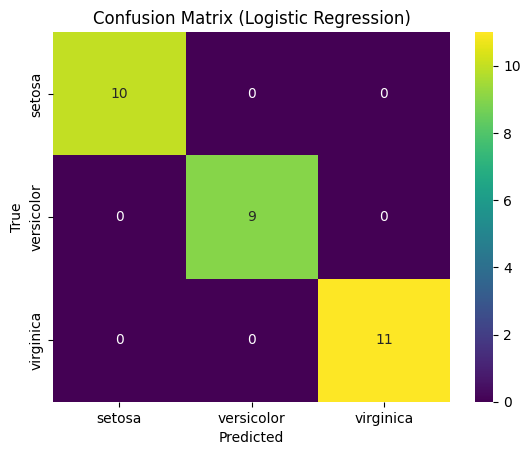

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the test set results
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(class_report)


C:\Users\ABHI\AppData\Local\Temp\ipykernel_15460\353269709.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', label='Test')


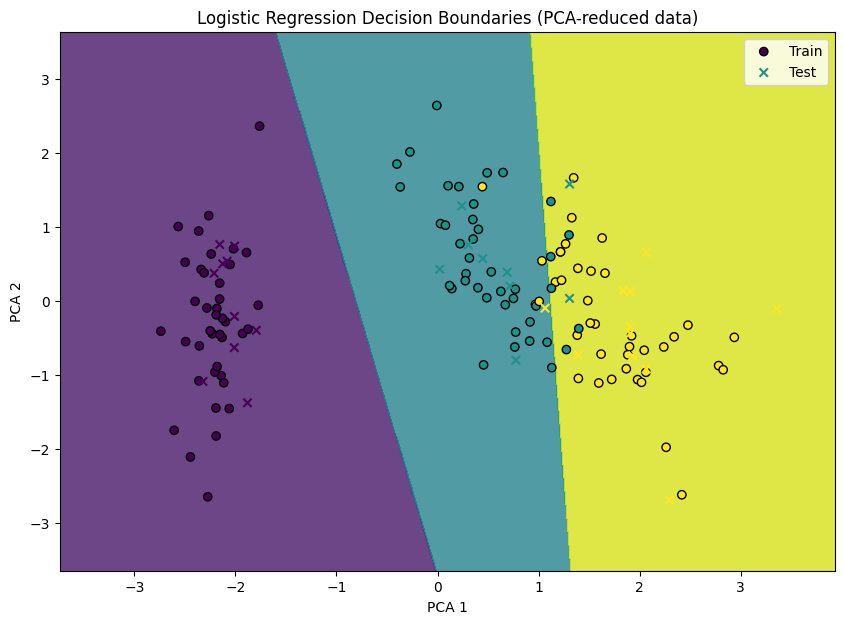

In [34]:
from sklearn.decomposition import PCA
import numpy as np


# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train logistic regression model on PCA-reduced data
log_reg_pca = LogisticRegression(max_iter=200)
log_reg_pca.fit(X_train_pca, y_train)

# Plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = log_reg_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', label='Test')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Logistic Regression Decision Boundaries (PCA-reduced data)')
plt.legend()
plt.show()
